<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plate-Detection-Using-Yolov5-(车牌提取)" data-toc-modified-id="Plate-Detection-Using-Yolov5-(车牌提取)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plate Detection Using Yolov5 (车牌提取)</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Data-Preprocess" data-toc-modified-id="Data-Preprocess-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Preprocess</a></span><ul class="toc-item"><li><span><a href="#Visualize-Single-Sample" data-toc-modified-id="Visualize-Single-Sample-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Visualize Single Sample</a></span></li><li><span><a href="#Visualize-Subplots-Sample" data-toc-modified-id="Visualize-Subplots-Sample-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Visualize Subplots Sample</a></span></li><li><span><a href="#Data-Convert-to-Yolov5" data-toc-modified-id="Data-Convert-to-Yolov5-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Data Convert to Yolov5</a></span></li></ul></li><li><span><a href="#Yolov5-Train" data-toc-modified-id="Yolov5-Train-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Yolov5 Train</a></span><ul class="toc-item"><li><span><a href="#GPU-Info" data-toc-modified-id="GPU-Info-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>GPU Info</a></span></li><li><span><a href="#Download-Yolov5-Codes" data-toc-modified-id="Download-Yolov5-Codes-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Download Yolov5 Codes</a></span></li><li><span><a href="#Setup-Configure-Files" data-toc-modified-id="Setup-Configure-Files-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Setup Configure Files</a></span></li><li><span><a href="#Execute-Bash-Script-(DDP)" data-toc-modified-id="Execute-Bash-Script-(DDP)-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Execute Bash Script (DDP)</a></span></li><li><span><a href="#Start-Train" data-toc-modified-id="Start-Train-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Start Train</a></span></li><li><span><a href="#Train-Result" data-toc-modified-id="Train-Result-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Train Result</a></span></li></ul></li><li><span><a href="#Yolov5-Detect" data-toc-modified-id="Yolov5-Detect-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Yolov5 Detect</a></span></li><li><span><a href="#Test-Summary" data-toc-modified-id="Test-Summary-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Test Summary</a></span></li></ul></li><li><span><a href="#LPRnet" data-toc-modified-id="LPRnet-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LPRnet</a></span><ul class="toc-item"><li><span><a href="#Download-Test-Dataset" data-toc-modified-id="Download-Test-Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Download Test Dataset</a></span></li><li><span><a href="#Generate-Dataset-From-CCPD" data-toc-modified-id="Generate-Dataset-From-CCPD-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Generate Dataset From CCPD</a></span></li><li><span><a href="#LRP-DataLoader" data-toc-modified-id="LRP-DataLoader-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LRP DataLoader</a></span></li><li><span><a href="#LPR-Model" data-toc-modified-id="LPR-Model-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LPR Model</a></span></li><li><span><a href="#Hyper-Parameters" data-toc-modified-id="Hyper-Parameters-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Hyper Parameters</a></span></li><li><span><a href="#Train-&amp;-Valid" data-toc-modified-id="Train-&amp;-Valid-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Train &amp; Valid</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Test</a></span></li></ul></li><li><span><a href="#Refrences" data-toc-modified-id="Refrences-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Refrences</a></span></li></ul></div>

In [1]:
%reload_ext autoreload
%autoreload 2
%reload_ext watermark
%watermark -v -p numpy,torch,torchvision,cv2,PIL,matplotlib

CPython 3.6.9
IPython 7.16.1

numpy 1.19.4
torch 1.8.0.dev20210103+cu101
torchvision 0.9.0.dev20210103+cu101
cv2 4.5.1
PIL 6.2.2
matplotlib 3.3.3


In [2]:
import os, sys, io
import numpy as np
import cv2
import random
import PIL.Image as Image
import torch, torchvision
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties
from IPython.display import display, HTML
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.use_jedi = False

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED);

In [3]:
display(HTML('<style>.container { width:%d%% !important; }</style>' % 90))

[SimHei Font: qsxp](https://pan.baidu.com/s/1AkoHvYbCYgLSJZDrCVv8RA "提取码: qsxp")

In [4]:
zh_font = FontProperties(fname='/data/font/simhei.ttf')

----------------------------

## Plate Detection Using Yolov5 (车牌提取)

### Dataset

[CCPD2019](https://github.com/detectRecog/CCPD)

[BaiduYun Drive(code: ol3j)](https://pan.baidu.com/s/1JSpc9BZXFlPkXxRK4qUCyw)

In [5]:
data_root = '/data/datasets/cv/CCPD2019'

!ls $data_root $data_root/splits

/data/datasets/cv/CCPD2019:
LICENSE    ccpd_base	   ccpd_db  ccpd_rotate   images
LPRnet	   ccpd_blur	   ccpd_fn  ccpd_tilt	  labels
README.md  ccpd_challenge  ccpd_np  ccpd_weather  splits

/data/datasets/cv/CCPD2019/splits:
ccpd_blur.txt	    ccpd_db.txt  ccpd_rotate.txt  test.txt   val.txt
ccpd_challenge.txt  ccpd_fn.txt  ccpd_tilt.txt	  train.txt


In [6]:
%%bash

mkdir -p /data/codes

if [[ ! -d /data/codes/yolov5 ]]
then
    git clone https://github.com/ultralytics/yolov5 /data/codes/yolov5
    cd /data/codes/yolov5 && pip3 install -r requirements.txt > /dev/null
fi

### Data Preprocess

In [7]:
def read_data(phase, category=None):
    with open(os.path.join(data_root, 'splits', f'{phase}.txt')) as fr:
        # data = fr.readlines()
        data = fr.read().splitlines()
        if category is not None:
            data = [x for x in data if x[5:].startswith(category)]
    return data

In [8]:
test_data = read_data('test')

In [9]:
provinces = ["皖", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏", "浙", "京", "闽", "赣", "鲁", "豫", 
             "鄂", "湘", "粤", "桂", "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "警", "学", "O"]

alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U',
             'V', 'W', 'X', 'Y', 'Z', 'O']

ads = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
       'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'O']

```
                           97&485_423&774
                      | {left up}_{right bottom}
                      |
   0         1        |   2                   3                         4               5            6
{area}-{tilt degree}-{bounding box}-{four vertices locations}-{license plate number}-{brightness}-{blurriness}
        |                                                       |
        | {horizontal tilt degree}_{vertical_tilt_degree}       |
                                27_21                           | {provinces}_{alphabets}_{ads}
                                                                         0_0_32_32_5_31_27
```

In [10]:
def parse_bbox_and_lpn(filename):
    segs = filename.split('-')
    bbox_vertices = segs[2].split('_')
    bbox_left_up = [int(x) for x in bbox_vertices[0].split('&')]
    bbox_right_bottom = [int(x) for x in bbox_vertices[1].split('&')]
    lps = [int(x) for x in segs[4].split('_')]
    return bbox_left_up, bbox_right_bottom, lps

def lpn_index2name(lpn):
    if len(lpn) != 7:
        raise
    return [provinces[lpn[0]]] + [alphabets[lpn[1]]] + [ads[lpn[i]] for i in range(2, 7)]

In [11]:
x1y1, x2y2, lpn = parse_bbox_and_lpn(test_data[-6])
x1y1, x2y2, lpn

([97, 485], [423, 774], [0, 0, 32, 32, 5, 31, 27])

In [12]:
x1y1, x2y2, lpn_index2name(lpn)

([97, 485], [423, 774], ['皖', 'A', '8', '8', 'F', '7', '3'])

#### Visualize Single Sample 

In [13]:
sample_image_file = os.path.join(data_root, test_data[-6])
sample_image_rgb = cv2.cvtColor(cv2.imread(sample_image_file), cv2.COLOR_BGR2RGB)
image_height, image_width = sample_image_rgb.shape[0:2]
image_height, image_width, sample_image_rgb.shape

(1160, 720, (1160, 720, 3))

In [14]:
sample_image_box = cv2.rectangle(sample_image_rgb, tuple(x1y1), tuple(x2y2), (0, 255, 0), 2)

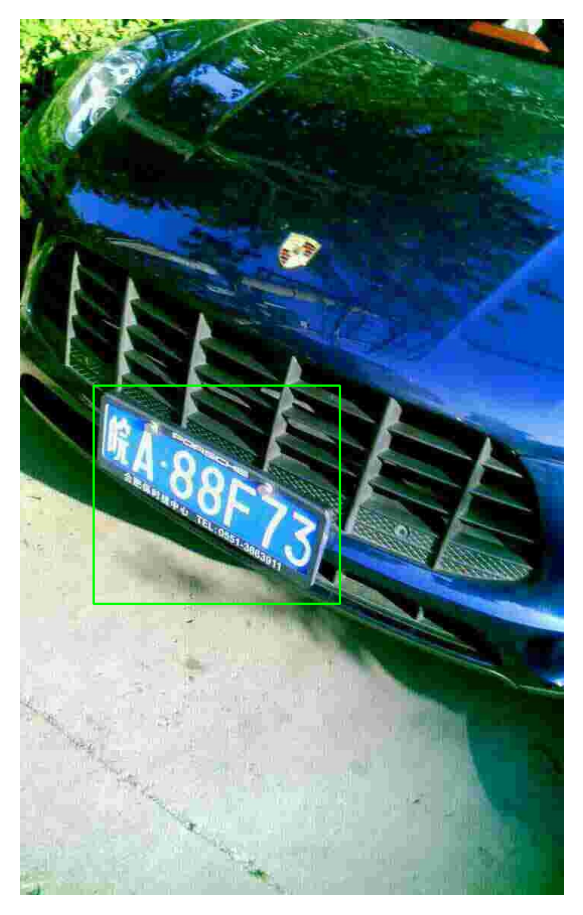

In [15]:
dpi = 100
fig_w, fig_h = 0.5*image_width/dpi, 0.5*image_height/dpi
plt.figure(figsize=(fig_w, fig_h), dpi=dpi)
plt.imshow(sample_image_box)
plt.axis('off');

#### Visualize Subplots Sample 

[SimHei Font: qsxp](https://pan.baidu.com/s/1AkoHvYbCYgLSJZDrCVv8RA "提取码: qsxp")

In [16]:
zh_font = FontProperties(fname='/data/font/simhei.ttf', size=14)

def visualize_data_subplots(rows, cols, images, titles=None, gray=False, isbgr=False,
                            resize=None, dpi=100, return_image=False):
    if isinstance(images[0], str):
        max_h, max_w = 0.8*rows*dpi, 0.8*cols*dpi
    else:
        max_h = max([ x.shape[0] for x in images])
        max_w = max([ x.shape[1] for x in images])
    figsize = (5 * int(max_w / dpi + 1), 5 * int(max_h / dpi + 1))
    fig = plt.figure(figsize=figsize, dpi=dpi)
    if titles is None:
        titles = [str(i) for i in range(1, len(images) + 1)]
    for i in range(rows * cols):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(titles[i], fontproperties=zh_font)
        # plt.xticks([])
        # plt.yticks([])
        plt.axis(False)
        img = images[i]
        if isinstance(img, str):
            img = cv2.imread(img)
            isbgr = True
        if resize:
            if isinstance(resize, int):
                resize = (resize, resize)
            img = cv2.resize(img, resize)
        if isbgr:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if gray:
            plt.imshow(img, cmap=plt.cm.gray)
        else: 
            plt.imshow(img)
    plt.tight_layout()
    if return_image:
        with io.BytesIO() as fw:
            plt.savefig(fw)
            fw.seek(0)
            return np.array(Image.open(fw)) 
    
def imshow(img, figsize=(8, 8), gray=False, isbgr=False):
    plt.figure(figsize=figsize)
    plt.axis('off')
    if isbgr:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
    if gray:
        plt.imshow(img, cmap=plt.cm.gray)
    else:
        plt.imshow(img)

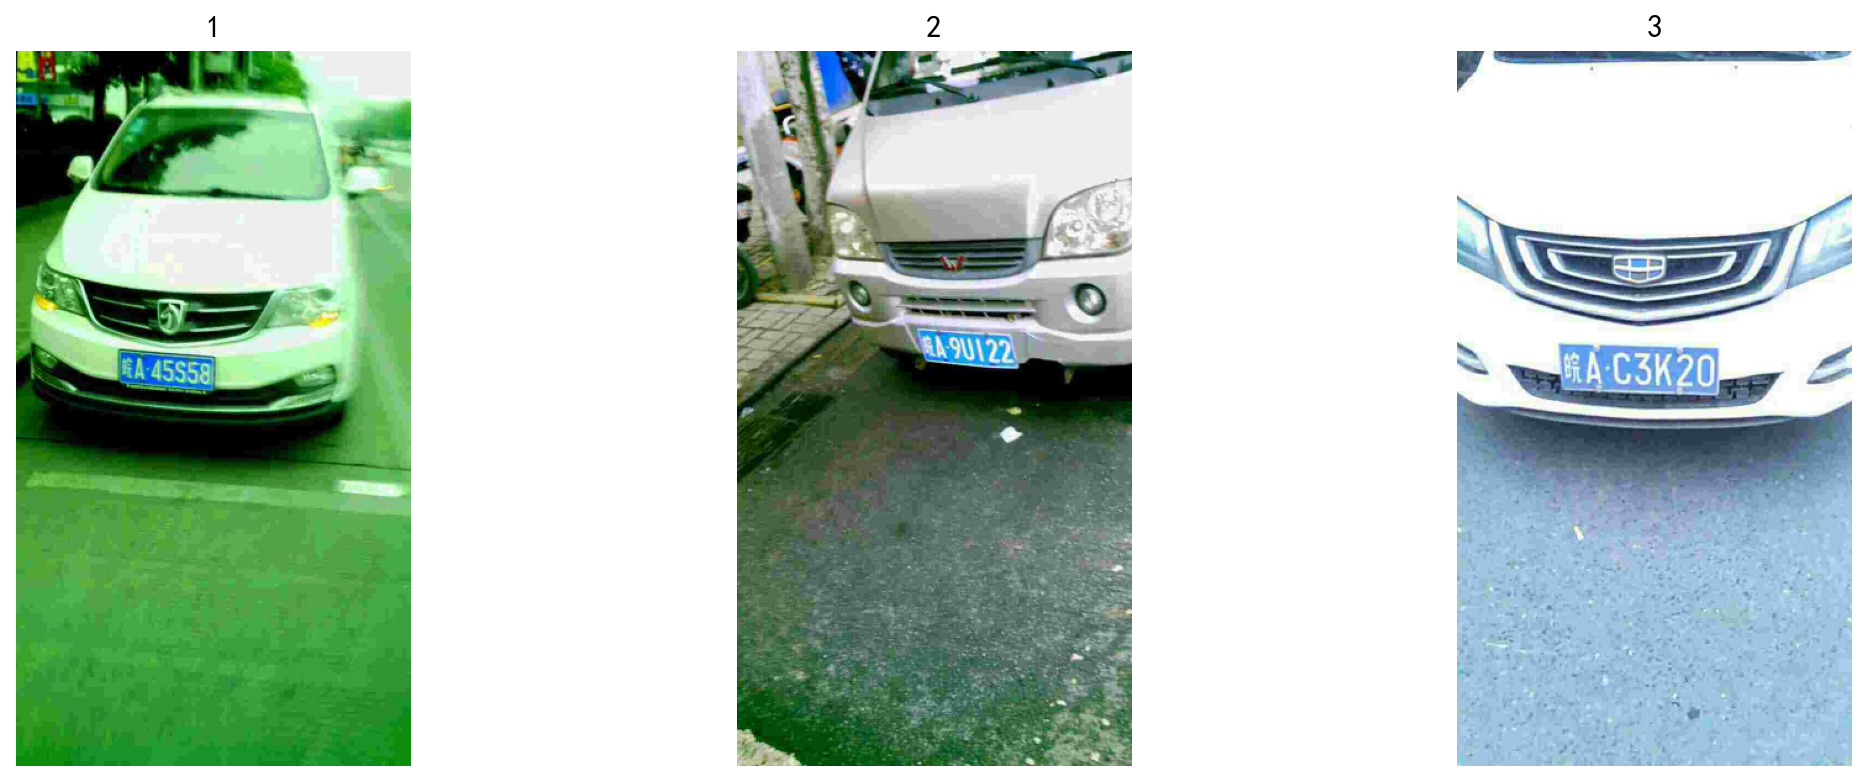

In [17]:
rows, cols = 1, 3
train_data = read_data('train')
images_sample_list = [os.path.join(data_root, train_data[i]) for i in range(cols*rows)]

visualize_data_subplots(rows, cols, images_sample_list, resize=(320, 580), dpi=80)

#### Data Convert to Yolov5 

In [18]:
def yolo_data_generate(phase, num=-1, force=False):
    # prepare data path
    phase_images_path = os.path.join(data_root, 'images', phase)
    phase_labels_path = os.path.join(data_root, 'labels', phase)
    if os.path.exists(phase_images_path) and \
        os.path.exists(phase_labels_path) and \
            not force:
                print(f'{phase} already exist')
                return
    os.makedirs(phase_images_path, exist_ok=True)
    os.makedirs(phase_labels_path, exist_ok=True)
    
    # parse file and format convert
    files_list = read_data(phase)
    if num > 0:
        files_list = files_list[:num]
    for filepath in files_list:
        basename = os.path.basename(filepath)
        image_src_path = os.path.join(data_root, filepath)
        image_dst_path = os.path.join(phase_images_path, basename)
        label_dst_path = os.path.join(phase_labels_path, basename.split('.')[0] + '.txt')
        x1y1, x2y2, _ = parse_bbox_and_lpn(basename)
        image_bgr = cv2.imread(image_src_path)
        bbox = yolo_normal_convert(image_bgr.shape[1], image_bgr.shape[0], *x1y1, *x2y2)
        ## generate label file
        with open(label_dst_path, 'w') as fw:
            fw.write('0 %.6f %.6f %.6f %.6f' % bbox)
        ## copy image file
        shutil.copy(image_src_path, image_dst_path)

In [19]:
yolo_data_generate('train', force=False)
yolo_data_generate('val', num=1000, force=False)
# yolo_data_generate('test', force=False)

train already exist
val already exist


In [20]:
def yolo_normal_convert(width, height, x1, y1, x2, y2):
    dw, dh = 1.0 / width, 1.0 / height
    bw, bh = (x2 - x1), (y2 - y1)
    cx, cy = (x1 + x2) / 2.0 - 1, (y1 + y2) / 2.0 - 1
    return round(cx * dw, 6), round(cy * dh, 6), round(bw * dw, 6), round(bh * dh, 6)
yolo_normal_convert(200, 200, 0, 0, 200, 200)

(0.495, 0.495, 1.0, 1.0)

### Yolov5 Train 

#### GPU Info

In [21]:
!nvidia-smi

Fri Apr 16 14:57:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P40           Off  | 00000000:00:06.0 Off |                    0 |
| N/A   42C    P0    56W / 250W |   2154MiB / 22919MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

#### Download Yolov5 Codes

In [22]:
%%bash

mkdir -p /data/codes

export YOLOV5_ROOT=/data/codes/yolov5

if [[ ! -d $YOLOV5_ROOT ]]
then
    git clone https://github.com/ultralytics/yolov5 $YOLOV5_ROOT
    cd $YOLOV5_ROOT && pip3 install -r requirements.txt > /dev/null
fi

#### Setup Configure Files

- `${YOLOV5_ROOT}/data/CCPD2019/dataset.yaml`

> ```yaml
> train: /data/datasets/cv/CCPD2019/images/train   
> val: /data/datasets/cv/CCPD2019/images/val   
> 
> nc: 1
> 
> names: ['licenseplates']
> ```


- `${YOLOV5_ROOT}/data/CCPD2019/hyperparameters.yaml`

>```yaml
> lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)  
> lrf: 0.2  # final OneCycleLR learning rate (lr0 * lrf)   
> momentum: 0.937  # SGD momentum/Adam beta1  
> weight_decay: 0.0005  # optimizer weight decay 5e-4  
> warmup_epochs: 3.0  # warmup epochs (fractions ok)   
> warmup_momentum: 0.8  # warmup initial momentum
> warmup_bias_lr: 0.1  # warmup initial bias lr
> box: 0.05  # box loss gain
> cls: 0.5  # cls loss gain
> cls_pw: 1.0  # cls BCELoss positive_weight
> obj: 1.0  # obj loss gain (scale with pixels)
> obj_pw: 1.0  # obj BCELoss positive_weight
> iou_t: 0.20  # IoU training threshold
> anchor_t: 4.0  # anchor-multiple threshold
> # anchors: 3  # anchors per output layer (0 to ignore)
> fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)
> hsv_h: 0.015  # image HSV-Hue augmentation (fraction)
> hsv_s: 0.7  # image HSV-Saturation augmentation (fraction)
> hsv_v: 0.4  # image HSV-Value augmentation (fraction)
> degrees: 0.0  # image rotation (+/- deg)
> translate: 0.1  # image translation (+/- fraction)
> scale: 0.5  # image scale (+/- gain)
> shear: 0.0  # image shear (+/- deg)
> perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
> flipud: 0.0  # image flip up-down (probability)
> fliplr: 0.5  # image flip left-right (probability)
> mosaic: 1.0  # image mosaic (probability)
> mixup: 0.0  # image mixup (probability)
> ```


- `${YOLOV5_ROOT}/data/CCPD2019/yolov5s.yaml`

> ```yaml
> # parameters
> nc: 1  # number of classes
> depth_multiple: 0.33  # model depth multiple
> width_multiple: 0.50  # layer channel multiple
> 
> # anchors
> anchors:
>   - [10,13, 16,30, 33,23]  # P3/8
>   - [30,61, 62,45, 59,119]  # P4/16
>   - [116,90, 156,198, 373,326]  # P5/32
> 
> # YOLOv5 backbone
> backbone:
>   # [from, number, module, args]
>   [[-1, 1, Focus, [64, 3]],  # 0-P1/2
>    [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
>    [-1, 3, BottleneckCSP, [128]],
>    [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
>    [-1, 9, BottleneckCSP, [256]],
>    [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
>    [-1, 9, BottleneckCSP, [512]],
>    [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
>    [-1, 1, SPP, [1024, [5, 9, 13]]],
>    [-1, 3, BottleneckCSP, [1024, False]],  # 9
>   ]
> 
> # YOLOv5 head
> head:
>   [[-1, 1, Conv, [512, 1, 1]],
>    [-1, 1, nn.Upsample, [None, 2, 'nearest']],
>    [[-1, 6], 1, Concat, [1]],  # cat backbone P4
>    [-1, 3, BottleneckCSP, [512, False]],  # 13
> 
>    [-1, 1, Conv, [256, 1, 1]],
>    [-1, 1, nn.Upsample, [None, 2, 'nearest']],
>    [[-1, 4], 1, Concat, [1]],  # cat backbone P3
>    [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)
> 
>    [-1, 1, Conv, [256, 3, 2]],
>    [[-1, 14], 1, Concat, [1]],  # cat head P4
>    [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)
> 
>    [-1, 1, Conv, [512, 3, 2]],
>    [[-1, 10], 1, Concat, [1]],  # cat head P5
>    [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)
> 
>    [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
>   ]
> ```

#### Execute Bash Script (DDP)

edit `$YOLOV5_ROOT/data/CCPD2019/train.sh`

```bash

#!/bin/bash

prog_name=$(basename $0)
master_addr=10.255.0.58
master_port=8555
nodes_num=1
procs_num=1
node_index=0
batch_size=96
ddp=False
level=s
out_dir=/data/result/CCPD2019

__usage() {
    echo ""
    echo "${prog_name} arguments:"
    echo "-m or --master master_addr:master_port"
    echo "-n or --nodes node/nnodes like 1/3"
    echo "-p or --procs num"
    echo "-l or --level"
    echo "-b or --bs batchsize"
    echo "-o or --output"
    echo "-h or --help"
    echo ""
}

ARGUMENT_LIST=(
    "master"
    "nodes"
    "procs"
    "level"
    "out"
    "bs"
)

opts=$(getopt \
    --options "$(printf "%.1s:" "${ARGUMENT_LIST[@]}")h::" \
    --longoptions "$(printf "%s:," "${ARGUMENT_LIST[@]}")help::" \
    --name "$prog_name" \
    -- "$@"
)

eval set --$opts

while [[ $# -gt 0 ]]; do
    case "$1" in
        -o|--out)
            out_dir=$2
            shift 2
            ;;

        -m|--master)
            ddp=True
            master_addr=`echo $2 | cut -d: -f1`
            master_port=`echo $2 | cut -d: -f2`
            shift 2
            ;;

        -n|--nodes)
            ddp=True
            nodes_num=`echo $2 | cut -d/ -f2`
            node=`echo $2 | cut -d/ -f1`
            node_index=`expr $node - 1`
            shift 2
            ;;

        -p|--procs)
            ddp=True
            procs_num=$2
            shift 2
            ;;

        -l|--level)
            ddp=True
            level=$2
            shift 2
            ;;

        -b|--bs)
            batch_size=$2
            shift 2
            ;;

        -h|--help)
            __usage && exit 1
            ;;

        *)
            break
            ;;
    esac
done

batch_size=`expr $batch_size \* $nodes_num`
data_root=data/CCPD2019

commargs="--img-size 640 --batch-size $batch_size --epochs 30 --device 0 \
    --workers 4 --project $out_dir --name $level --exist-ok \
    --data $data_root/dataset.yaml \
    --cfg $data_root/yolov5$level.yaml \
    --hyp $data_root/hyperparameters.yaml \
    --weights 'weights/yolov5$level.pt'"

__kill_resource() {
    pid=`ps -eo pid,args | grep "train.py" | grep -v "grep" | cut -c 1-6`
    if [[ x$pid != x ]]
    then
        echo "kill $pid"
        kill -9 $pid
    fi
}

__kill_resource

if [[ x$ddp == xTrue ]]
then
    echo "DDP run $batch_size"
    python3 -m torch.distributed.launch \
        --nproc_per_node=$procs_num --nnodes=$nodes_num --node=$node_index \
        --master_addr $master_addr --master_port $master_port \
        train.py $commargs
else
    python3 train.py $commargs
fi

__kill_resource

```

#### Start Train

Run `train.sh` in the `$YOLOV5_ROOT`.

A. Single Machine

```bash
./data/CCPD2019/train.sh --bs 64 --out /data/result/CCPD2019
```

B. Multiple GPUs (DDP), eg: I have 3 gpu machines

> node-1 (master)
> ```bash
> ./data/CCPD2019/train.sh --level s --bs 64 --out /data/result/CCPD2019 --nodes 1/3
> ```

> node-2
> ```bash
> ./data/CCPD2019/train.sh --level s --bs 64 --out /data/result/CCPD2019 --nodes 2/3
> ```


> node-3
> ```bash
> ./data/CCPD2019/train.sh --level s --bs 64 --out /data/result/CCPD2019 --nodes 3/3
> ```

#### Train Result

`tree /data/result/CCPD2019 `

> ```
> /data/result/CCPD2019/weights/
> ├── best.pt
> └── last.pt
> ```

### Yolov5 Detect

In [23]:
# add syspath
WEIGHTS_PATH = '/data/result/CCPD2019/weights/last.pt'
IMAGE_SIZE = 512

YOLOV5_ROOT = '/data/codes/yolov5'
PYYOLO_PATH = os.path.dirname(YOLOV5_ROOT)
import sys
if PYYOLO_PATH not in sys.path: 
    sys.path.append(PYYOLO_PATH)
    sys.path.append(YOLOV5_ROOT)
    
# import yolov5
from yolov5.models.experimental import attempt_load
from yolov5.utils.torch_utils import select_device
from yolov5.utils.datasets import LoadImages
from yolov5.utils.general import check_img_size, non_max_suppression
from yolov5.utils.general import scale_coords
from yolov5.utils.plots import plot_one_box

# detect
device = select_device(device='0')
model = attempt_load(WEIGHTS_PATH, map_location=device)
imgsz = check_img_size(IMAGE_SIZE, s=model.stride.max())
model = model.half() # amp
print(imgsz)

conf_thres = 0.35
iou_thres = 0.45

images_predbox_list = []
for img_path in images_sample_list:
    dataset = LoadImages(img_path, img_size=imgsz)
    path, img, im0, _ = next(iter(dataset))
    img = torch.from_numpy(img).to(device)
    img = img.half() / 255.0
    if img.ndimension() == 3:
        img = img.unsqueeze(0)
    pred = model(img, augment=False)[0]
    pred = non_max_suppression(pred, conf_thres, iou_thres)
    for i, det in enumerate(pred):
        if len(det) == 0:
            print(f'{path} is not detect pl')
            continue
        det[:, :4] = scale_coords(img.shape[2:], det[:, :4], im0.shape).round()
        for *xyxy, conf, cls in reversed(det):
            images_predbox_list.append({
                'image_path': img_path,
                'pred_box': [int(x) for x in xyxy]
            })
            break # we only using first best for test
            
# print result
for jitem in images_predbox_list:
    imgpath = jitem['image_path']
    predbox = jitem['pred_box']
    print(os.path.basename(imgpath).split('-')[2], predbox)

Fusing layers... 
512
image 1/1 /data/datasets/cv/CCPD2019/ccpd_base/0092816091954-94_82-181&490_358&548-363&554_189&540_190&484_364&498-0_0_28_29_16_29_32-133-13.jpg: image 1/1 /data/datasets/cv/CCPD2019/ccpd_base/0104418103448-91_84-329&442_511&520-515&519_340&508_326&447_501&458-0_0_33_18_25_26_26-166-27.jpg: image 1/1 /data/datasets/cv/CCPD2019/ccpd_base/023275862069-90_86-173&473_468&557-485&563_189&555_187&469_483&477-0_0_2_27_9_26_24-178-36.jpg: 181&490_358&548 [186, 483, 364, 551]
329&442_511&520 [330, 448, 513, 517]
173&473_468&557 [183, 471, 480, 560]


In [24]:
images_cropped_list = []
for jitem in images_predbox_list:
    imgpath = jitem['image_path']
    x1, y1, x2, y2 = jitem['pred_box']
    img = cv2.imread(imgpath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images_cropped_list.append(img[y1:y2, x1:x2, :])

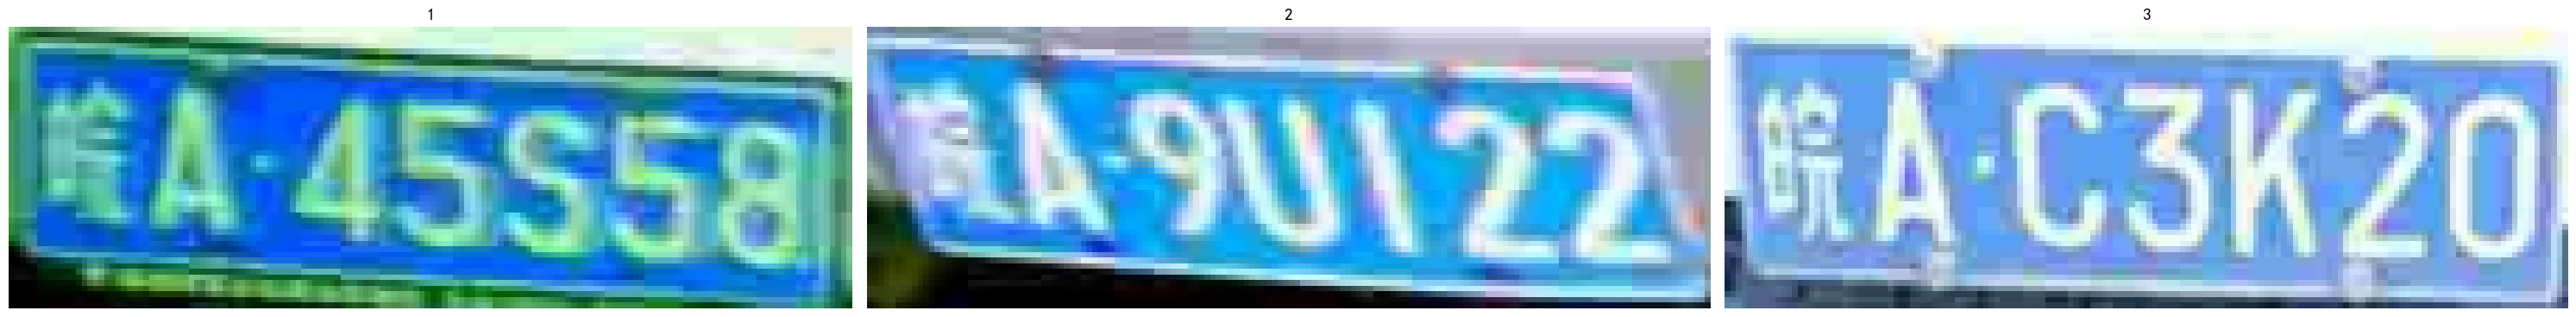

In [25]:
ncols = 3
nrows = int((len(images_sample_list) - 1) / ncols + 1)
visualize_data_subplots(nrows, ncols, images_cropped_list, resize=(150, 50), dpi=50)

### Test Summary

In [26]:
def LPDetect(model, img_path, conf_thres=0.35, iou_thres=0.45):
    device = next(model.parameters()).device
    imgsz = check_img_size(640, s=model.stride.max())
    dataset = LoadImages(img_path, img_size=imgsz)
    path, img, im0, _ = next(iter(dataset))
    img = torch.from_numpy(img).to(device)
    img = img.half() / 255.0
    if img.ndimension() == 3:
        img = img.unsqueeze(0)
    pred = model(img, augment=False)[0]
    pred = non_max_suppression(pred, conf_thres, iou_thres)
    if len(pred) > 0:
        det = pred[0]
        det[:, :4] = scale_coords(img.shape[2:], det[:, :4], im0.shape).round()
        *xyxy, _conf, _cls = reversed(det)[0] # only best
        x1, y1, x2, y2 = [int(x.cpu()) for x in xyxy]
        # return im0[y1:y2, x1:x2, ::-1] # BGR to RGB
        return im0[y1:y2, x1:x2]
    return None

image 1/1 /data/datasets/cv/CCPD2019/ccpd_base/0092816091954-94_82-181&490_358&548-363&554_189&540_190&484_364&498-0_0_28_29_16_29_32-133-13.jpg: image 1/1 /data/datasets/cv/CCPD2019/ccpd_base/0104418103448-91_84-329&442_511&520-515&519_340&508_326&447_501&458-0_0_33_18_25_26_26-166-27.jpg: image 1/1 /data/datasets/cv/CCPD2019/ccpd_base/023275862069-90_86-173&473_468&557-485&563_189&555_187&469_483&477-0_0_2_27_9_26_24-178-36.jpg: 

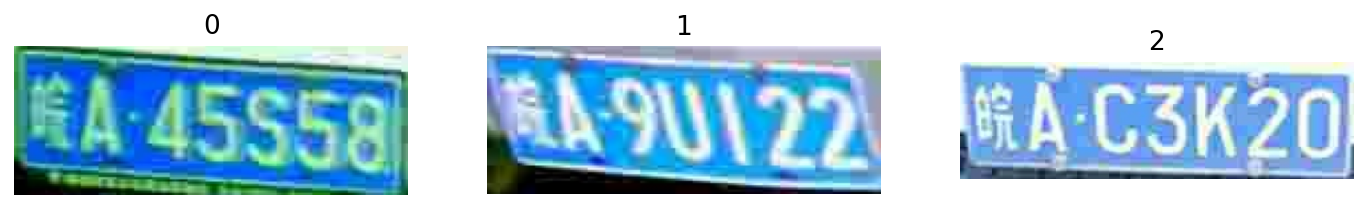

In [27]:
# Test
fig = plt.figure(figsize=(4*ncols, 2*nrows))

grid = gridspec.GridSpec(figure=fig, ncols=ncols, nrows=nrows, hspace=0.2, wspace=0.2)

lp_test_imgs = []
for i, path in enumerate(images_sample_list):
    imgbgr = LPDetect(model, path, 0.45, 0.5)
    if imgbgr is not None:
        fig.add_subplot(grid[i])
        plt.title(f'{i}')
        plt.axis(False)
        plt.imshow(imgbgr[:, :, ::-1])
        lp_test_imgs.append(imgbgr)

---------------

## LPRnet

In [28]:
import torch.optim as optim
from torch import nn
from torch.utils.data import (Dataset, DataLoader)
from torchvision.utils import make_grid
from torch.optim.lr_scheduler import (
    StepLR,
    MultiStepLR,
    ReduceLROnPlateau)
from torchsummary import summary

lp_data_root = os.path.join(data_root, 'LPRnet')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Download Test Dataset

In [29]:
%%bash

export LP_DATA_ROOT=/data/datasets/cv/CCPD2019/LPRnet

# download test dataset
if [[ ! -d $LP_DATA_ROOT/test ]]
then
    apt install subversion
    cd $LP_DATA_ROOT
    svn co https://github.com/sirius-ai/LPRNet_Pytorch/trunk/data/test 
fi

# download pretrained weights
if [[ ! -f $LP_DATA_ROOT/weights/Final_LPRNet_model.pth ]]
then
    cd $LP_DATA_ROOT
    svn co https://github.com/sirius-ai/LPRNet_Pytorch/trunk/weights
fi

In [30]:
pretrained_weights = f'{lp_data_root}/weights/Final_LPRNet_model.pth'

### Generate Dataset From CCPD

In [31]:
CHARS = [
    '京', '沪', '津', '渝', '冀', '晋', '蒙', '辽', '吉', '黑',
    '苏', '浙', '皖', '闽', '赣', '鲁', '豫', '鄂', '湘', '粤',
    '桂', '琼', '川', '贵', '云', '藏', '陕', '甘', '青', '宁',
    '新',
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K',
    'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
    'W', 'X', 'Y', 'Z', 'I', 'O', '-'
]
CHARS_DICT = {char:i for i, char in enumerate(CHARS)}
NUM_CLASS = len(CHARS)
BLANK_IDX = NUM_CLASS - 1
INPUT_SIZE = (94, 24) # (w, h)
BATCH_SIZE = 640
MAX_LPR_NUM = 8
MAX_T_STEPS = 18 # >= 2 * MAX_LPR_NUM + 1

In [32]:
def generate_dataset(phase):
    data_path = os.path.join(lp_data_root, phase)
    if os.path.exists(data_path):
        return
    os.makedirs(data_path, exist_ok=True)
    data_list = read_data(phase)
    for file in data_list:
        imgpath = os.path.join(data_root, file)
        imgbgr = cv2.imread(imgpath)
        (x1, y1), (x2, y2), lpn = parse_bbox_and_lpn(file)
        imgnew = imgbgr[y1:y2, x1:x2, ::]
        imgbgr = cv2.resize(imgnew, (94, 24))
        filepath = f'{data_path}/{"".join(lpn_index2name(lpn))}.jpg'
        cv2.imwrite(filepath, imgbgr)
        
# train/皖GHS010.jpg,12_47_48_57_31_32_31
def generate_csv_file(phase):
    data_path = os.path.join(lp_data_root, phase)
    if not os.path.exists(data_path):
        print('not found:', data_path)
        return None
    csv_path = f'{data_path}.csv'
    if os.path.exists(csv_path):
        return csv_path
    with open(csv_path, 'w') as fw:
        items = []
        for file in os.listdir(data_path):
            labels = []
            for char in file[:-4]:
                labels.append(str(CHARS_DICT[char]))
            items.append(f'{phase}/{file},{"_".join(labels)}')
        fw.write('\n'.join(items))
        
    return csv_path

In [33]:
generate_dataset('train')
generate_dataset('val')
generate_dataset('test')

train_csv_path = generate_csv_file('train')
valid_csv_path = generate_csv_file('val')
test_csv_path = generate_csv_file('test')

### LRP DataLoader

In [34]:
def tensor2npimg(img, mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)):
    if not isinstance(img, np.ndarray):
        if isinstance(img, torch.Tensor):
            timg = img.data
        else:
            raise
        np_img = timg.cpu().float().numpy()
        if np_img.shape[0] == 1: # gray
            np_img = np.tile(np_img, (3, 1, 1)) # (c, h, w)
        for i in range(len(mean)):
            np_img[i] = np_img[i] * std[i] + mean[i]
        np_img = np_img * 255
        np_img = np.transpose(np_img, (1, 2, 0)) # (h, w, c)
    else:
        np_img = img
    return np_img.astype(np.uint8)

In [35]:
class LPRDataset(Dataset):
    def __init__(self, csv_path, input_size=(94, 24)):
        self.input_size = input_size # w, h
        self.images = []
        self.labels = []
        with open(csv_path, 'r') as fr:
            for line in fr.read().split('\n'):
                image, label_str = line.split(',')
                self.images.append(os.path.join(lp_data_root, image))
                self.labels.append([int(x) for x in label_str.split('_')])
                
    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = cv2.resize(cv2.imread(self.images[index]), self.input_size)
        image = image.astype('float32')
        image -= 127.5
        image *= 0.0078125  # 1/128
        image = np.transpose(image, (2, 0, 1)) # (C, H, W)
        label = np.array(self.labels[index], dtype=np.int)
        return torch.from_numpy(image), torch.from_numpy(label)
    
def collate_fn(batch): # labels tuple to batch tensor
    images, labels, input_lengths, label_lengths = [], [], [], []
    for image, label in batch:
        images.append(image)
        labels.extend(label)
        label_lengths.append(len(label))  # CCPD2019 all is 7 chars
        input_lengths.append(MAX_T_STEPS)
    # labels = np.asarray(labels, dtype=np.int)
    return torch.stack(images, 0), torch.stack(labels, 0), label_lengths, input_lengths 

(torch.Size([640, 3, 24, 94]), torch.Size([4480]), [18, 18, 18], 4480)

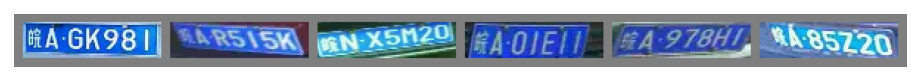

In [36]:
train_dl = DataLoader(
    LPRDataset(train_csv_path, INPUT_SIZE),
    batch_size = BATCH_SIZE,
    shuffle=True,
    num_workers=4,
    drop_last=True,
    pin_memory=True,
    collate_fn=collate_fn)

valid_dl = DataLoader(
    LPRDataset(valid_csv_path, INPUT_SIZE),
    batch_size = BATCH_SIZE,
    shuffle=False,
    num_workers=4,
    drop_last=False,
    collate_fn=collate_fn)

# sample test
images, labels, label_lengths, input_lengths = next(iter(train_dl))
test_img = make_grid(images[:6], nrow=6, padding=6, normalize=False)
imshow(tensor2npimg(test_img), isbgr=True)
images.shape, labels.shape, input_lengths[0:3], np.sum(label_lengths)

### LPR Model

In [37]:
class small_basic_block(nn.Module):
    def __init__(self, ch_in, ch_out):
        super(small_basic_block, self).__init__()
        ch = ch_out // 4
        self.block = nn.Sequential(
            nn.Conv2d(ch_in, ch, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(ch, ch, kernel_size=(3, 1), padding=(1, 0)),
            nn.ReLU(),
            nn.Conv2d(ch, ch, kernel_size=(1, 3), padding=(0, 1)),
            nn.ReLU(),
            nn.Conv2d(ch, ch_out, kernel_size=1),
        )
        
    def forward(self, x):
        return self.block(x)

class LPRNet(nn.Module):
    def __init__(self, num_class, dropout_rate = 0.5):
        super(LPRNet, self).__init__()
        self.num_class = num_class
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1), # 0
            nn.BatchNorm2d(num_features=64), # 1
            nn.ReLU(),  # 2
            nn.MaxPool3d(kernel_size=(1, 3, 3), stride=(1, 1, 1)), # 3
            small_basic_block(ch_in=64, ch_out=128),    # *** 4 ***
            nn.BatchNorm2d(num_features=128), # 5
            nn.ReLU(),  # 6
            nn.MaxPool3d(kernel_size=(1, 3, 3), stride=(2, 1, 2)), # 7
            small_basic_block(ch_in=64, ch_out=256),   # 8
            nn.BatchNorm2d(num_features=256), # 9
            nn.ReLU(),  # 10
            small_basic_block(ch_in=256, ch_out=256),   # *** 11 ***
            nn.BatchNorm2d(num_features=256),   # 12
            nn.ReLU(), # 13
            nn.MaxPool3d(kernel_size=(1, 3, 3), stride=(4, 1, 2)),  # 14
            nn.Dropout(dropout_rate), # 15
            nn.Conv2d(in_channels=64, out_channels=256, kernel_size=(1, 4), stride=1),  # 16
            nn.BatchNorm2d(num_features=256), # 17
            nn.ReLU(),  # 18
            nn.Dropout(dropout_rate), # 19
            nn.Conv2d(in_channels=256, out_channels=num_class, kernel_size=(13, 1), stride=1), # 20
            nn.BatchNorm2d(num_features=num_class), # 21
            nn.ReLU(),  # *** 22 ***
        )
        # 448 = 64 + 128 + 256
        self.container = nn.Sequential(
            nn.Conv2d(in_channels=448+self.num_class,
                      out_channels=self.num_class,
                      kernel_size=(1, 1), stride=(1, 1)),
        )
        
        # init weights
        # for m in self.modules():
        #     if isinstance(m, nn.Conv2d):
        #         nn.init.kaiming_normal_(m.weight, mode='fan_out')
        #         if m.bias is not None:
        #             nn.init.zeros_(m.bias)
        #     elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
        #         nn.init.ones_(m.weight)
        #         nn.init.zeros_(m.bias)
        #     elif isinstance(m, nn.Linear):
        #         nn.init.normal_(m.weight, 0, 0.01)
        #         nn.init.zeros_(m.bias)

    def forward(self, x):
        keep_features = list()
        for i, layer in enumerate(self.backbone.children()):
            x = layer(x)
            if i in [2, 6, 13, 22]: # [2, 4, 8, 11, 22]
                keep_features.append(x)

        global_context = list()
        for i, f in enumerate(keep_features):
            if i in [0, 1]:
                f = nn.AvgPool2d(kernel_size=5, stride=5)(f)
            if i in [2]:
                f = nn.AvgPool2d(kernel_size=(4, 10), stride=(4, 2))(f)
            f_pow = torch.pow(f, 2)
            f_mean = torch.mean(f_pow)
            f = torch.div(f, f_mean)
            global_context.append(f)
        x = torch.cat(global_context, 1)
        x = self.container(x)  # (batch, n_class, 4, timestep)
        logits = torch.mean(x, dim=2) # (batch, n_class, timestep)
        return logits 
    
model = LPRNet(num_class=NUM_CLASS)
model = model.to(device)

summary(model, input_size=(3, 24, 94), batch_size=8, device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [8, 64, 22, 92]           1,792
       BatchNorm2d-2            [8, 64, 22, 92]             128
              ReLU-3            [8, 64, 22, 92]               0
         MaxPool3d-4            [8, 64, 20, 90]               0
            Conv2d-5            [8, 32, 20, 90]           2,080
              ReLU-6            [8, 32, 20, 90]               0
            Conv2d-7            [8, 32, 20, 90]           3,104
              ReLU-8            [8, 32, 20, 90]               0
            Conv2d-9            [8, 32, 20, 90]           3,104
             ReLU-10            [8, 32, 20, 90]               0
           Conv2d-11           [8, 128, 20, 90]           4,224
small_basic_block-12           [8, 128, 20, 90]               0
      BatchNorm2d-13           [8, 128, 20, 90]             256
             ReLU-14           [8, 128,

### Hyper Parameters

In [38]:
criterion = torch.nn.CTCLoss(blank=NUM_CLASS-1, reduction='mean')
# optimizer = optim.Adam(model.parameters(), lr=0.01)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.8, nesterov=True)
optimizer = optim.RMSprop(
    model.parameters(), lr=0.001, alpha=0.9, eps=1e-8,
    momentum=0.9, weight_decay=2e-5)
# scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=6)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)
# scheduler = MultiStepLR(optimizer, milestones=[x for x in range(6, 50, 5)], gamma=0.1)

### Train & Valid

In [39]:
def train_epoch(epoch, model, device, data_loader, criterion, optimizer):
    model.train()
    allloss = []
    for batch_idx, (images, targets, label_lengths, input_lengths) in enumerate(data_loader):
        images, targets = images.to(device), targets.to(device)
        optimizer.zero_grad()
        logits = model(images)
        log_probs = F.log_softmax(logits, dim=2)
        log_probs = logits.permute(2, 0, 1) # (timestep, batch, n_class): (T, N, C)
        loss = criterion(
            log_probs,
            targets=targets,
            input_lengths=tuple(input_lengths),
            target_lengths=tuple(label_lengths))
        loss.backward()
        optimizer.step()
        allloss.append(loss)
    print('epoch:', epoch, 'loss:', torch.stack(allloss).mean().item())

def valid_epoch(epoch, model, device, data_loader):
    model.eval()
    with torch.no_grad():
        for batch_idx, (images, targets, label_lengths, input_lengths) in enumerate(data_loader):
            images, targets = images.to(device), targets.to(device)
            preds = model(images) # (batch, n_class, timestep)
            preds = preds.cpu().detach()
            labels_with_blank = preds[0, :, :].argmax(dim=0).numpy() # just 0 for test
            labels = []
            check_repeat = False
            for x in labels_with_blank:
                if x == BLANK_IDX:
                    check_repeat = False
                    continue
                if check_repeat and labels[-1] == x:
                    continue
                labels.append(x)
                check_repeat = True
            print('epoch:', epoch, 'result:', ''.join([CHARS[j] for j in labels]))
            break # only for test

def train(epoch_num, net, train_dataloader, valid_dataloader, criterion, optimizer, scheduler, retrain=False):
    # load
    ckpt_model = os.path.join(lp_data_root, 'weights', 'last.pth')
    if not retrain:
        if os.path.exists(ckpt_model):
            net.load_state_dict(torch.load(ckpt_model))
        else:
            net.load_state_dict(torch.load(pretrained_weights))
        
    for epoch in range(1, epoch_num+1):
        train_epoch(epoch, net, device, train_dataloader, criterion, optimizer)
        valid_epoch(epoch, net, device, valid_dataloader)
        scheduler.step()
        
        # save
        torch.save(net.state_dict(), os.path.join(lp_data_root, 'weights', 'last.pth'))
        
train(1, model, train_dl, valid_dl, criterion, optimizer, scheduler, retrain=False)

epoch: 1 loss: 0.11074686795473099
epoch: 1 result: 皖AX371H


### Test

In [40]:
test_dl = DataLoader(
    LPRDataset(test_csv_path, INPUT_SIZE),
    batch_size = 8,
    shuffle=False,
    num_workers=4,
    drop_last=False)

model.load_state_dict(torch.load(os.path.join(lp_data_root, 'weights', 'last.pth')))
model.eval()

tp, tn1, tn2 = 0, 0, 0
with torch.no_grad():
    for images, targets in test_dl:
        preds = model(images.to(device))
        preds = preds.cpu().detach()
        preds = preds.argmax(dim=1).numpy() # (batch, 18)
        for true_label, labels_with_blank in zip(targets.numpy(), preds):
            pred_label = []
            check_repeat = False
            for x in labels_with_blank:
                if x == BLANK_IDX:
                    check_repeat = False
                    continue
                if check_repeat and pred_label[-1] == x:
                    continue
                pred_label.append(int(x))
                check_repeat = True
            if len(true_label) != len(pred_label):
                tn1 += 1
                continue
            if (true_label == pred_label).all():
                tp += 1
            else:
                tn2 += 1
print(tp, tn1, tn2, 'correct:', float(tp) / (tp + tn1 + tn2))

969 7 24 correct: 0.969


## Refrences

- [CTC](https://sid2697.github.io/Blog_Sid/algorithm/2019/10/19/CTC-Loss.html)
- [CTC Paper](https://www.cs.toronto.edu/~graves/icml_2006.pdf)
- [如何优雅的使用pytorch内置torch.nn.CTCLoss的方法](https://zhuanlan.zhihu.com/p/67415439)
- [GITHUB: LPRNet](https://github.com/sirius-ai/LPRNet_Pytorch)